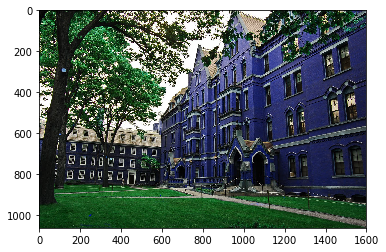

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

im = cv2.imread('Harvard.jpg')
plt.imshow(im)
plt.show()


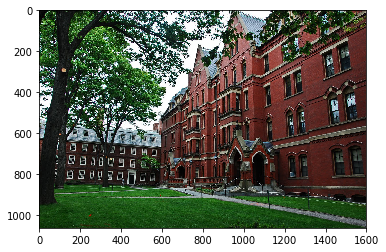

In [11]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [12]:
rows = 100
cols = int(100*im.shape[1]/float(im.shape[0]))
cv2.resize(im, (cols, rows))

pixels = np.reshape(im,(-1,3))
#pixels = np.reshape(im,(160*100,3))
#print(pixels.shape)



In [13]:
km = KMeans(n_clusters=8)
km.fit(pixels)

print(km.cluster_centers_)

[[  27.33671785   75.26009301   23.23996516]
 [ 241.24826172  247.06574219  248.20205078]
 [ 134.92812917  131.03797213  120.72453524]
 [  18.46796651   22.92874163   15.49334052]
 [ 116.72729791   57.9928055    52.20206389]
 [ 168.86107375  185.15994422  182.57755381]
 [  73.67202469   98.00715898   74.4874008 ]
 [  67.878389     35.935975     31.37998832]]


In [14]:
cluster_center = np.array(km.cluster_centers_, dtype='uint32')
print(cluster_center)
print(cluster_center.shape)

print(km.labels_)

print(km.labels_.shape)

print(np.unique(km.labels_, return_counts=True))



[[ 27  75  23]
 [241 247 248]
 [134 131 120]
 [ 18  22  15]
 [116  57  52]
 [168 185 182]
 [ 73  98  74]
 [ 67  35  31]]
(8, 3)
[3 3 3 ..., 3 3 0]
(1702400,)
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([318326, 102424, 128974, 489655, 140619, 101146, 133837, 287419]))


In [15]:
freq = np.unique(km.labels_, return_counts=True)[1]

print(freq)

print(np.sum(freq))



freq = freq/float(np.sum(freq))
print(freq)



[318326 102424 128974 489655 140619 101146 133837 287419]
1702400
[ 0.18698661  0.06016447  0.0757601   0.28762629  0.08260045  0.05941377
  0.07861666  0.16883165]


In [16]:
DOM = []

for i in range(km.n_clusters):
    vals = [freq[i], cluster_center[i]]
    DOM.append(vals)

for i in DOM:
    print(DOM)
DOM = sorted(DOM, key=lambda z:z[0], reverse = True)
for i in DOM:
    print(i)



[[0.18698660714285714, array([27, 75, 23], dtype=uint32)], [0.060164473684210525, array([241, 247, 248], dtype=uint32)], [0.075760103383458649, array([134, 131, 120], dtype=uint32)], [0.28762629229323311, array([18, 22, 15], dtype=uint32)], [0.082600446428571422, array([116,  57,  52], dtype=uint32)], [0.059413768796992485, array([168, 185, 182], dtype=uint32)], [0.078616658834586461, array([73, 98, 74], dtype=uint32)], [0.16883164943609022, array([67, 35, 31], dtype=uint32)]]
[[0.18698660714285714, array([27, 75, 23], dtype=uint32)], [0.060164473684210525, array([241, 247, 248], dtype=uint32)], [0.075760103383458649, array([134, 131, 120], dtype=uint32)], [0.28762629229323311, array([18, 22, 15], dtype=uint32)], [0.082600446428571422, array([116,  57,  52], dtype=uint32)], [0.059413768796992485, array([168, 185, 182], dtype=uint32)], [0.078616658834586461, array([73, 98, 74], dtype=uint32)], [0.16883164943609022, array([67, 35, 31], dtype=uint32)]]
[[0.18698660714285714, array([27, 75

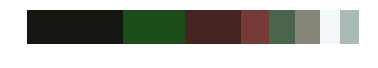

In [17]:
disp_patch = np.ones((50, 500, 3))

start = 0


for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*disp_patch.shape[1])
    end = start + width
    disp_patch[:,start:end,:] = 255-DOM[ix][1]
    start = end
    plt.axis("off")

plt.imshow(disp_patch)
plt.show()